In [1]:
!wget https://github.com/karolpiczak/ESC-50/archive/master.zip
!unzip master.zip


--2025-03-28 05:04:28--  https://github.com/karolpiczak/ESC-50/archive/master.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master [following]
--2025-03-28 05:04:28--  https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [           <=>      ] 615.78M  12.8MB/s    in 45s     

2025-03-28 05:05:13 (13.8 MB/s) - ‘master.zip’ saved [645695005]

Archive:  master.zip
33c8ce9eb2cf0b1c2f8bcf322eb349b6be34dbb6
   creating: ESC-50-master/
   creating: ESC-50-master/.circleci/
  inflating: ESC-50-

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd


In [3]:
# Leer el archivo con información de los audios
df = pd.read_csv("ESC-50-master/meta/esc50.csv")
df.head()


,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


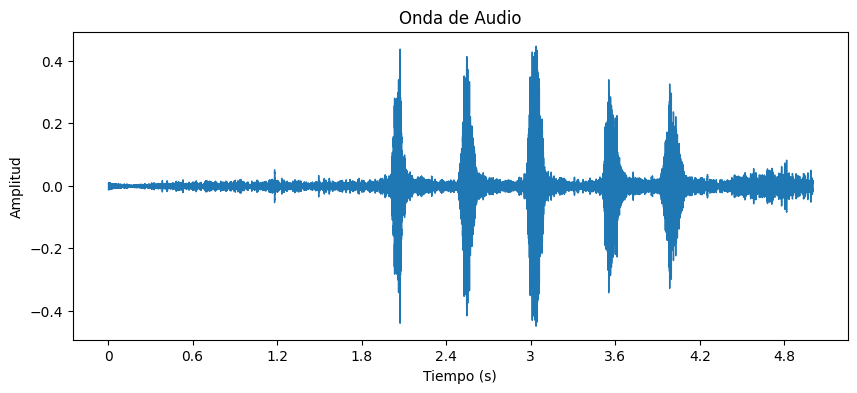

In [4]:
# Seleccionar un audio de la categoría 'dog'
audio_file = "ESC-50-master/audio/1-30226-A-0.wav"

# Cargar el audio
y, sr = librosa.load(audio_file, sr=None)

# Graficar la onda de tiempo
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Onda de Audio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()


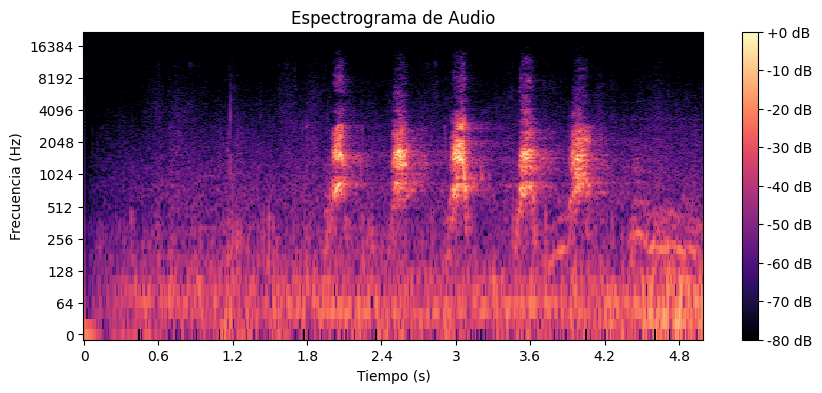

In [5]:
# Convertir el audio en un espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de Audio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()


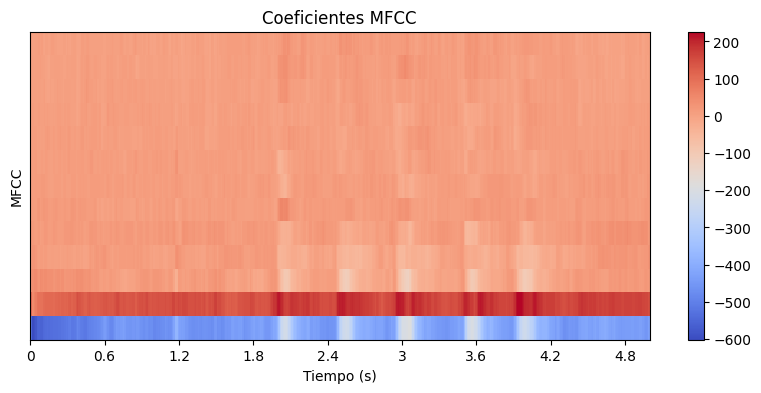

In [6]:
# Extraer coeficientes MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('Coeficientes MFCC')
plt.xlabel('Tiempo (s)')
plt.ylabel('MFCC')
plt.show()


In [7]:
import random

# Seleccionar aleatoriamente 4 audios del dataset
num_audios = 4
sample_files = df.sample(num_audios)["filename"].tolist()

# Ruta base del dataset
base_path = "ESC-50-master/audio/"

# Cargar audios
audios = [librosa.load(base_path + file, sr=None) for file in sample_files]


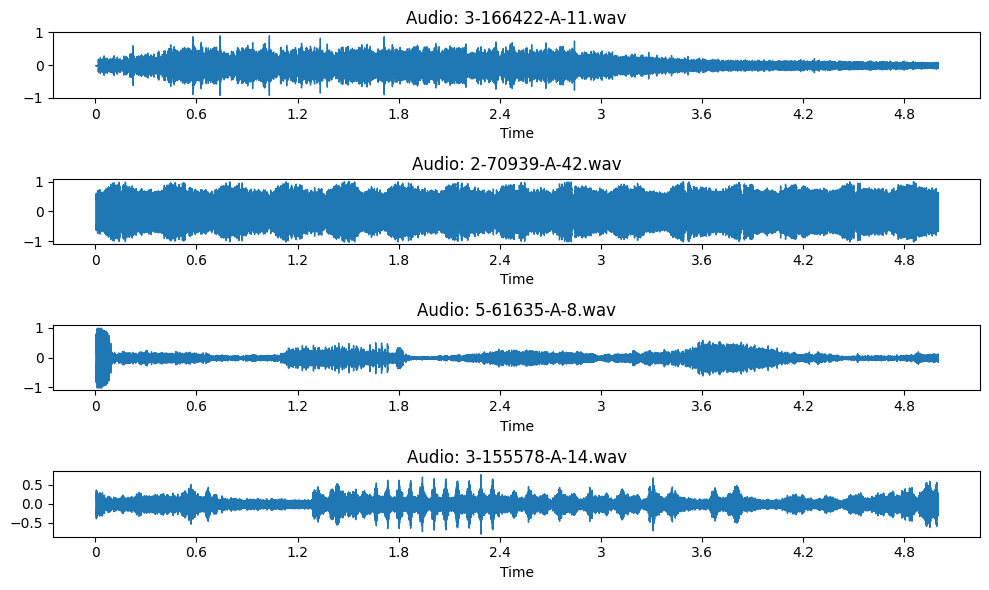

In [8]:
fig, axes = plt.subplots(num_audios, 1, figsize=(10, 6))

for i, (y, sr) in enumerate(audios):
    axes[i].set_title(f"Audio: {sample_files[i]}")
    librosa.display.waveshow(y, sr=sr, ax=axes[i])

plt.tight_layout()
plt.show()


<ipython-input-13-ae7f9e60681c>:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


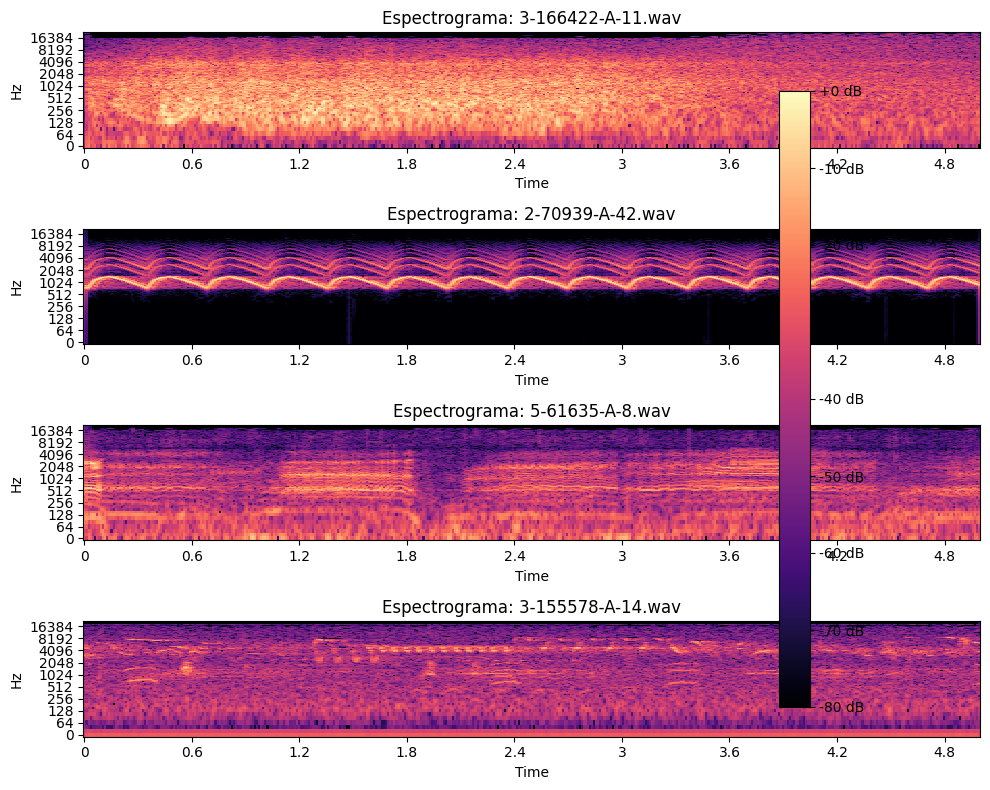

In [13]:
fig, axes = plt.subplots(num_audios, 1, figsize=(10, 8))

for i, (y, sr) in enumerate(audios):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log", ax=axes[i])  # ← GUARDAR EL MAPA DE COLOR
    axes[i].set_title(f"Espectrograma: {sample_files[i]}")

fig.colorbar(img, ax=axes, format='%+2.0f dB')  # ← ASOCIAR COLORBAR A TODAS LAS SUBGRÁFICAS
plt.tight_layout()
plt.show()


<ipython-input-15-fb4e4ad43815>:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


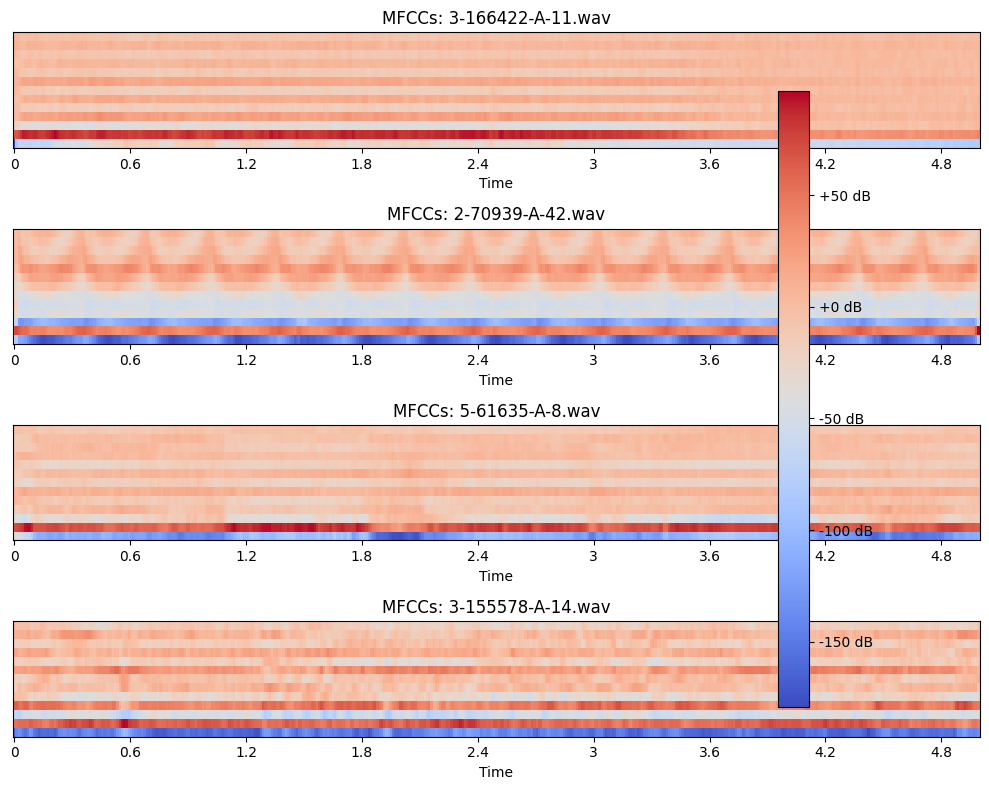

In [15]:
fig, axes = plt.subplots(num_audios, 1, figsize=(10, 8))

for i, (y, sr) in enumerate(audios):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    img = librosa.display.specshow(mfccs, sr=sr, x_axis="time", ax=axes[i])  # ← GUARDAR IMAGEN
    axes[i].set_title(f"MFCCs: {sample_files[i]}")

fig.colorbar(img, ax=axes, format='%+2.0f dB')  # ← ASOCIAR EL COLORBAR A LAS GRÁFICAS
plt.tight_layout()
plt.show()

